<a href="https://colab.research.google.com/github/dyahynugraheni/Pemrogaman_Python/blob/main/Python_Minggu_14_Dyah_Yekti_Nugraheni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
NtL = lambda x: 10*np.log10(x)
LtN = lambda x: 10**(x/10)

In [ ]:
def cost(freq,tipe,tower,user,d):
    if freq in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif freq in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((freq/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(freq))+18.33*(np.log10(freq))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(freq)-0.7)*user-(1.56*np.log10(freq)-1.8)
    Lp = Ca+(Cb*np.log10(freq))-(13.83*np.log(tower))-ahr+((44.9-6.55*np.log10(tower))*np.log10(d))-Cm
    
    return Lp

In [ ]:
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #banyak titik
dtr=30 #Watt
gti=10 #dB
gra=2 #dB
bw=5000 #MHz
d=np.random.randint(dmin,dmax,N)

In [ ]:
#fungsi daya terima, SnR, kapasitas seluler
def dayaterima(dtr,pl,gti,gra):
  dtr1 = NtL(dtr)
  daya = dtr - pl + gti + gra
  daya1 = LtN(daya)
  return daya1

def SnR(dayaterima,bw):
  noise = -174 + 10*np.log10(bw)
  noise1 = LtN(noise)
  SnR = dayaterima/noise1
  return SnR

def kapasitas(SnR,bw):
  snr1 = LtN(SnR)
  kselr = bw*np.log2(1+snr1)
  return kselr

In [ ]:
#daya terima frekuensi sama
def dturban():
  f=1800 
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  d_sort=d[np.argsort(d)]
  urban_sort=dtfix[np.argsort(d)]
  return d_sort,urban_sort

def dtsuburban():
  f=1800 
  loc='suburban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  d_sort=d[np.argsort(d)]
  urban_sort=dtfix[np.argsort(d)]
  return d_sort,urban_sort
  
def dtopen():
  f=1800 
  loc='open'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  d_sort=d[np.argsort(d)]
  urban_sort=dtfix[np.argsort(d)]
  return d_sort,urban_sort

  
d11,pl11 = dturban()
d12,pl12 = dtsuburban()
d13,pl13 = dtopen()


#daya terima lokasi sama
def dt700():
  f=700
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  d_sort=d[np.argsort(d)]
  urban_sort=dtfix[np.argsort(d)]
  return d_sort,urban_sort

def dt900():
  f=900
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  d_sort=d[np.argsort(d)]
  urban_sort=dtfix[np.argsort(d)]
  return d_sort,urban_sort

def dt1800():
  f=1800 
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  d_sort=d[np.argsort(d)]
  urban_sort=dtfix[np.argsort(d)]
  return d_sort,urban_sort

d21,pl21 = dt700()
d22,pl22 = dt900()
d23,pl23 = dt1800()

<Figure size 432x288 with 0 Axes>

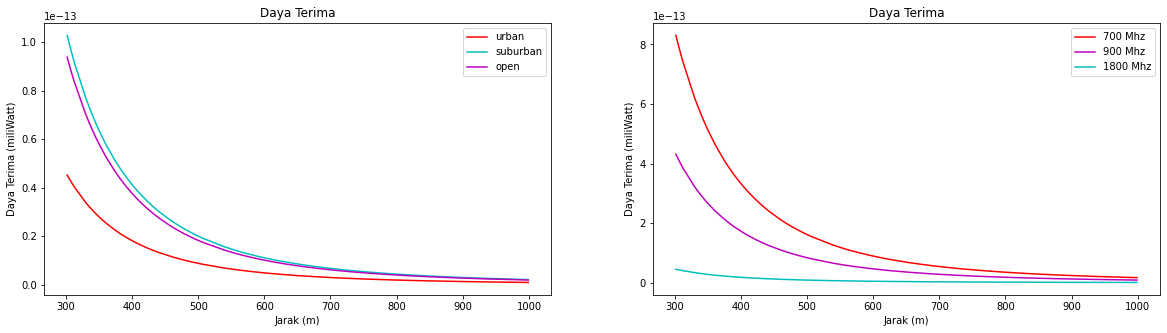

In [ ]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("Daya Terima")
sb1.set_xlabel('Jarak (m)')
sb1.set_ylabel('Daya Terima (miliWatt)')
sb1.plot(d11,pl11,'r', label='urban')
sb1.plot(d12,pl12,'c', label='suburban')
sb1.plot(d13,pl13,'m', label='open')
sb1.legend()

sb2.set_title("Daya Terima")
sb2.set_xlabel('Jarak (m)')
sb2.set_ylabel('Daya Terima (miliWatt)')
sb2.plot(d21,pl21,'r', label='700 Mhz')
sb2.plot(d22,pl22,'m', label='900 Mhz')
sb2.plot(d23,pl23,'c', label='1800 Mhz')
sb2.legend()

plt.show()

In [ ]:
#signal to noise ratio (SNR) frekuensi sama
def snrurban():
  f=1800 
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=snrfix[np.argsort(d)]
  return d_sort,urban_sort

def snrsuburban():
  f=1800 
  loc='suburban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=snrfix[np.argsort(d)]
  return d_sort,urban_sort
  
def snropen():
  f=1800 
  loc='open'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=snrfix[np.argsort(d)]
  return d_sort,urban_sort

  
d11,pl11 = snrurban()
d12,pl12 = snrsuburban()
d13,pl13 = snropen()


#signal to noise ratio (SNR) lokasi sama
def snr700():
  f=700
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=snrfix[np.argsort(d)]
  return d_sort,urban_sort

def snr900():
  f=900
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=snrfix[np.argsort(d)]
  return d_sort,urban_sort

def snr1800():
  f=1800 
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=snrfix[np.argsort(d)]
  return d_sort,urban_sort

d21,pl21 = snr700()
d22,pl22 = snr900()
d23,pl23 = snr1800()

<Figure size 432x288 with 0 Axes>

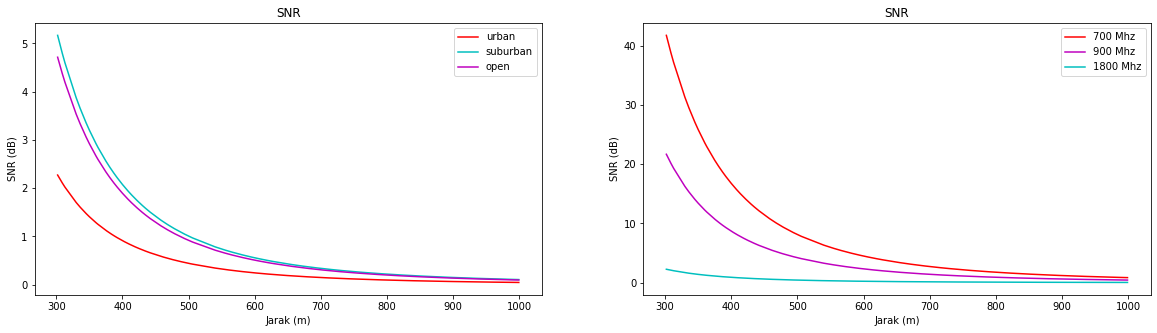

In [ ]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("SNR")
sb1.set_xlabel('Jarak (m)')
sb1.set_ylabel('SNR (dB)')
sb1.plot(d11,pl11,'r', label='urban')
sb1.plot(d12,pl12,'c', label='suburban')
sb1.plot(d13,pl13,'m', label='open')
sb1.legend()

sb2.set_title("SNR")
sb2.set_xlabel('Jarak (m)')
sb2.set_ylabel('SNR (dB)')
sb2.plot(d21,pl21,'r', label='700 Mhz')
sb2.plot(d22,pl22,'m', label='900 Mhz')
sb2.plot(d23,pl23,'c', label='1800 Mhz')
sb2.legend()

plt.show()

In [ ]:
#kapasitas seluler frekuensi sama
def kseurban():
  f=1800 
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  ksefix = kapasitas(snrfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=ksefix[np.argsort(d)]
  return d_sort,urban_sort

def ksesuburban():
  f=1800 
  loc='suburban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  ksefix = kapasitas(snrfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=ksefix[np.argsort(d)]
  return d_sort,urban_sort
  
def kseopen():
  f=1800 
  loc='open'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  ksefix = kapasitas(snrfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=ksefix[np.argsort(d)]
  return d_sort,urban_sort

  
d11,pl11 = kseurban()
d12,pl12 = ksesuburban()
d13,pl13 = kseopen()


#signal to noise ratio (SNR) lokasi sama
def kse700():
  f=700
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  ksefix = kapasitas(snrfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=ksefix[np.argsort(d)]
  return d_sort,urban_sort

def kse900():
  f=900
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  ksefix = kapasitas(snrfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=ksefix[np.argsort(d)]
  return d_sort,urban_sort

def kse1800():
  f=1800 
  loc='urban'
  pl=cost(f,loc,tower,user,d)
  dtfix = dayaterima(dtr,pl,gti,gra)
  snrfix = SnR(dtfix,bw)
  ksefix = kapasitas(snrfix,bw)
  d_sort=d[np.argsort(d)]
  urban_sort=ksefix[np.argsort(d)]
  return d_sort,urban_sort

d21,pl21 = kse700()
d22,pl22 = kse900()
d23,pl23 = kse1800()

<Figure size 432x288 with 0 Axes>

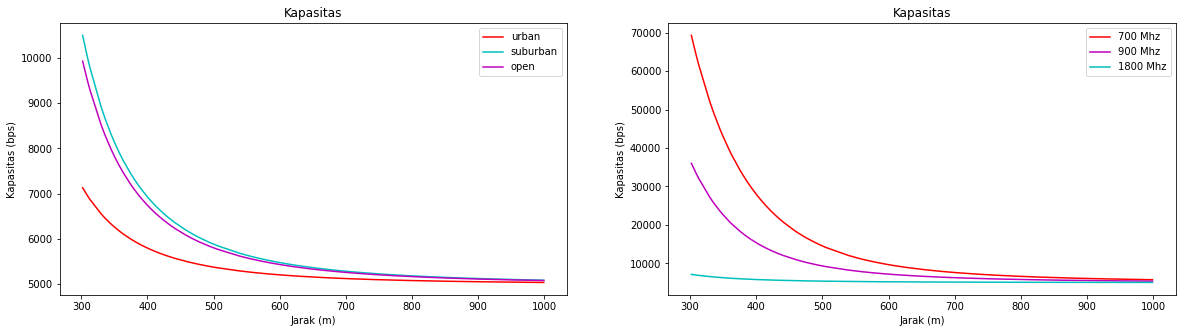

In [ ]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("Kapasitas")
sb1.set_xlabel('Jarak (m)')
sb1.set_ylabel('Kapasitas (bps)')
sb1.plot(d11,pl11,'r', label='urban')
sb1.plot(d12,pl12,'c', label='suburban')
sb1.plot(d13,pl13,'m', label='open')
sb1.legend()

sb2.set_title("Kapasitas")
sb2.set_xlabel('Jarak (m)')
sb2.set_ylabel('Kapasitas (bps)')
sb2.plot(d21,pl21,'r', label='700 Mhz')
sb2.plot(d22,pl22,'m', label='900 Mhz')
sb2.plot(d23,pl23,'c', label='1800 Mhz')
sb2.legend()

plt.show()